In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv(r"D:\Ultimate Programming\Data Bases\Project Dataset\Netflix\mymoviedb.csv", lineterminator='\n')

In [ ]:
df.head(3)

# Data Preprocessing Or Data Cleaning

In [ ]:
# Check for null values
print(df.isnull().sum().sum())

In [ ]:
# Check for duplicated rows
print(df.duplicated().sum().sum())

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])

In [ ]:
df['Release_Year'] = df['Release_Date'].dt.year

In [ ]:
df['Release_Month'] = df['Release_Date'].dt.strftime('%B')
df.head(1)

In [ ]:
df = df.drop(['Overview', 'Poster_Url', 'Release_Date'], axis=1)

In [ ]:
df['Original_Language'].value_counts().head(10)

data = {'Original_Language': ['en', 'ja', 'es', 'fr', 'ko', 'zh', 'it', 'cn', 'ru', 'de', 'pt']}
language = pd.DataFrame(data)
lang_map = {
    'en': 'English',
    'ja': 'Japanese',
    'es': 'Spanish',
    'fr': 'French',
    'ko': 'Korean',
    'zh': 'Chinese (Mandarin)',
    'it': 'Italian',
    'cn': 'Chinese (Simplified)',
    'ru': 'Russian',
    'de': 'German',
    'pt': 'Portuguese'
}
df['Original_Language'] = language['Original_Language'].replace(lang_map)

In [ ]:
df.head(1)

In [ ]:
def catigorize_columns(df, col, labels):
    category = [
        df[col].min(),               
        df[col].quantile(0.25),     
        df[col].quantile(0.50),     
        df[col].quantile(0.75),
        df[col].max() + 0.1 
    ]
    df['Vote_Avg'] = pd.cut(df[col], bins=category, labels=labels, include_lowest=True, duplicates='drop')
    return df

In [ ]:
labels = ['Not_Popular', 'Below_Avg', 'Average', 'Popular']

df = catigorize_columns(df, 'Vote_Average', labels)
df.head(2)

In [ ]:
df.nunique()

# EDA (Exploratory Data Analysis)

In [ ]:
sns.set_style('whitegrid')

In [ ]:
sns.countplot(data=df, x='Vote_Avg', palette='magma')
plt.title('Distribution of Vote Averages', fontsize=16)
plt.xlabel('Vote Average (Rounded)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

In [ ]:
data = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(8,4))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

In [ ]:
plt.figure(figsize=(10,5))
sns.pairplot(data,palette='viridis')
plt.show()

# Data Visualization

## Most frequent genre of movies released on Netflix

In [52]:
genre = df['Genre'].value_counts(sort=True).head(10)
freq_genre = pd.DataFrame(genre)
freq_genre.columns = ['total_freq']
freq_genre = freq_genre.reset_index()
freq_genre.columns = ['genre', 'total_freq']
freq_genre.head(10)

,genre,total_freq
0,Drama,466
1,Comedy,403
2,"Drama, Romance",248
3,Horror,238
4,"Horror, Thriller",199
5,"Comedy, Romance",196
6,Documentary,139
7,"Comedy, Drama",137
8,"Action, Thriller",125
9,"Comedy, Drama, Romance",107


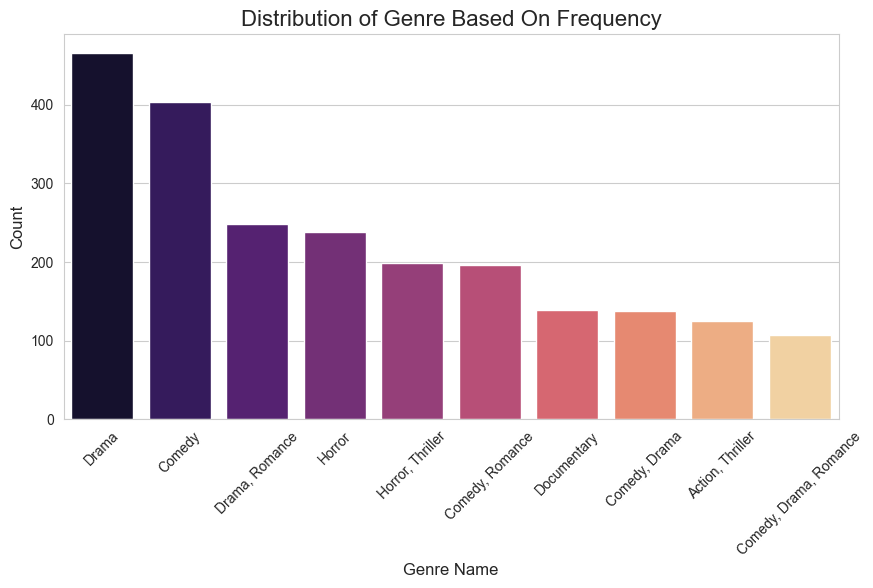

In [55]:
plt.figure(figsize=(10,5))
sns.barplot(data=freq_genre, x='genre', y = 'total_freq', palette="magma")
plt.title('Distribution of Genre Based On Frequency', fontsize=16)
plt.xlabel('Genre Name', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()